In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 18:22:01.359842: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 18:22:01.396773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 18:22:01.916442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_rosa_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']
  
dados = dados[['Ano','Cam_rosa_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_rosa_ind'] = dados.loc[i,'Cam_rosa_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_rosa_ind'].values
dados.head()

/tmp/ipykernel_74478/1706614840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']


,Ano,Cam_rosa_ind,Soma,Prop_Cam_rosa_ind
0,1982,94.0,163.0,0.576687
1,1983,96.0,245.0,0.391837
2,1984,41.0,218.0,0.188073
3,1996,201.0,202.5,0.992593
4,1998,215.5,219.0,0.984018


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [19]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=230, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop ind 1962-2009/.weights.h5', overwrite=True)

Epoch 1/230


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step - loss: 1.0370
Epoch 2/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9991
Epoch 3/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9705
Epoch 4/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9437
Epoch 5/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9170
Epoch 6/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8911
Epoch 7/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8625
Epoch 8/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8310
Epoch 9/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7961
Epoch 10/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7583
Epoch 11/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7190
Epoch 12/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6798
Epoch 13/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6443
Epoch 14/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6161
Epoch 15/230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5982
Epoch 16/230
1/1 ━━━━━━━━━━━━━

In [20]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop ind 1962-2009/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.96385276]
 [0.94652283]
 [0.92788327]
 [0.9078949 ]
 [0.88778484]
 [0.86810726]
 [0.84840167]
 [0.8286978 ]
 [0.8084866 ]
 [0.7850851 ]
 [0.75854975]
 [0.73437345]
 [0.71440244]
 [0.6962306 ]
 [0.67588663]
 [0.65584147]
 [0.63500667]
 [0.6127125 ]
 [0.5850064 ]
 [0.54858315]
 [0.47429943]
 [0.3782473 ]
 [0.28250396]
 [0.2602104 ]
 [0.31633845]
 [0.38755232]
 [0.46462533]
 [0.5468198 ]
 [0.6301655 ]
 [0.7039528 ]
 [0.7774881 ]
 [0.84923697]
 [0.9146254 ]
 [0.9674976 ]
 [0.9944476 ]
 [0.99766445]
 [0.9897226 ]
 [0.97891486]
 [0.96761596]
 [0.97507083]
 [0.9838537 ]
 [0.9882818 ]
 [0.9884477 ]
 [0.9853543 ]
 [0.98164594]
 [0.9740149 ]
 [0.97152746]
 [0.9672959 ]]


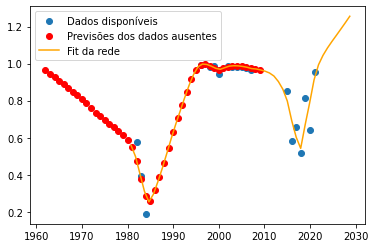

In [21]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

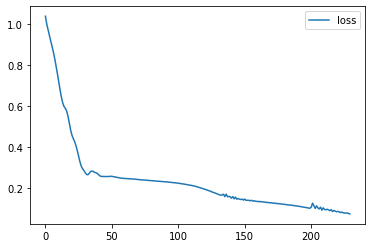

In [22]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [23]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_ind (sem sete_barbas e branco)
df_prev_Camarao_ind = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Cam_ind_sem_sb_br.xlsx')

for i in range(len(df_prev_Camarao_ind['Ano'])):
       df.loc[i,'Camarao_ind'] = df_prev_Camarao_ind.loc[i,'Camarao_ind']
df = df.replace(np.nan,0)

df_preenchido = df[['Ano','Cam_rosa_ind']].replace(np.nan,0)

for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_rosa_ind']=df_preenchido.loc[i,'Cam_rosa_ind']+df.loc[i,'Camarao_ind']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_ind']*prev_continua[i]
      
df_preenchido = df_preenchido.loc[:2009-1950,:]

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)



#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Previsão Camarao_rosa_ind_1962-2009.xlsx')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Ano  Cam_rosa_ind  Valor acrescido
0   1950  0.000000e+00     0.000000e+00
1   1951  0.000000e+00     0.000000e+00
2   1952  2.021547e-13     2.021547e-13
3   1953  0.000000e+00     0.000000e+00
4   1954  0.000000e+00     0.000000e+00
5   1955  0.000000e+00     0.000000e+00
6   1956 -2.071209e-13    -2.071209e-13
7   1957  0.000000e+00     0.000000e+00
8   1958  2.094721e-13     2.094721e-13
9   1959 -2.105769e-13    -2.105769e-13
10  1960  0.000000e+00     0.000000e+00
11  1961  0.000000e+00     0.000000e+00
12  1962  2.519307e+00     2.519307e+00
13  1963  1.293071e+01     1.293071e+01
14  1964  2.769972e+01     2.769972e+01
15  1965  4.441127e+01     4.441127e+01
16  1966  5.874888e+01     5.874888e+01
17  1967  1.099703e+02     1.099703e+02
18  1968  2.171450e+02     2.171450e+02
19  1969  1.592225e+02     1.592225e+02
20  1970  2.724951e+02     2.724951e+02
21  1971  2.628286e+02     2.628286e+02
22  1972  3.600066e+02     3.600066e+02
23

In [24]:
#Planilha com Camarao_ind decrescido do que ja foi usado de 1962 até 2009 (sete_barbas ,branco, rosa)
Cam_ind_sem_sb_br_ro_62_09 = df[['Ano','Camarao_ind']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_ind_sem_sb_br_ro_62_09.loc[i,'Camarao_ind']-=Cam_ind_sem_sb_br_ro_62_09.loc[i,'Camarao_ind']*prev_continua[i]

Cam_ind_sem_sb_br_ro_62_09 = Cam_ind_sem_sb_br_ro_62_09.iloc[:2010-1950,:]
with pd.option_context('display.max_rows', None,):
  print(Cam_ind_sem_sb_br_ro_62_09)

Cam_ind_sem_sb_br_ro_62_09.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_ind_sem_sb_br_ro_62-09.xlsx')

     Ano  Camarao_ind
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.094481
13  1963     0.730566
14  1964     2.152872
15  1965     4.505482
16  1966     7.425804
17  1967    16.707932
18  1968    38.800980
19  1969    32.913269
20  1970    64.548340
21  1971    71.948608
22  1972   114.591949
23  1973   228.769409
24  1974    68.191498
25  1975   279.356201
26  1976   132.397034
27  1977   383.385742
28  1978    42.245056
29  1979  3650.751465
30  1980    99.362900
31  1981   102.512474
32  1982    56.538345
33  1983    27.049784
34  1984    32.823696
35  1985   357.323944
36  1986    33.689045
37  1987    13.624564
38  1988    15.779595
39  1989    50.026443
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  